# Matplotlib homework (Analysis)

# Observations and insights

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
#See headers for both datasets to know what they contain
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
#Count total number of mice 
len(mouse_metadata["Mouse ID"].value_counts())

249

In [7]:
#Count total number of mice with unique 
mice_number= mouse_metadata["Mouse ID"].nunique()
total_micedf = pd.DataFrame({"Total Mice":[mice_number]})
total_micedf

,Total Mice
0,249


In [8]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results, on ="Mouse ID")


In [9]:
# Display the data table for preview
mouse_study.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [10]:
# Add count to know total number of lines and see if drop.duplicate worked. 
mouse_study.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
show_duplicates = mouse_study[mouse_study.duplicated(["Mouse ID", "Timepoint"])]
show_duplicates.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          20         54.657650           1                   1
                                                        15         53.442020           0                   1
                                                        10         49.880528           0                   1
                                                        5          47.570392           0                   1
                                                        0          45.000000           0                   1
dtype: int64

In [12]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_study.loc[mouse_study['Mouse ID'] == "g989",:]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study.drop_duplicates(subset = ["Mouse ID","Timepoint"])


In [14]:
# Checking the number of mice in the clean DataFrame. It has to be 1893 - 5
clean_mouse_study.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

# Summary statistics 

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_groups = clean_mouse_study.groupby(["Drug Regimen"])

In [16]:
drug_groups = clean_mouse_study.groupby(["Drug Regimen"])
# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Get average/mean of tumor volume
Average_tv = round(drug_groups["Tumor Volume (mm3)"].mean(),2)

# Get the median of tumor volume
Median_tv = round(drug_groups["Tumor Volume (mm3)"].median(),2)

# Get the variance of tumor volume
Variance_tv = round(drug_groups["Tumor Volume (mm3)"].var(),2)

#Get the standard deviation of tumor volume
Sdev_tv = round(drug_groups["Tumor Volume (mm3)"].std(),2)

#Get the SEM of tumor volume
SEM_tv = round(drug_groups["Tumor Volume (mm3)"].sem(),2)

#Create a new dataframe with new information

Drug_summarydf_a = pd.DataFrame({ "Mean Tumor Volume":Average_tv, 
                                    "Median Tumor Volume": Median_tv, 
                                    "Variance Tumor Volume": Variance_tv, 
                                    "Standard Deviation Tumor Volume": Sdev_tv,
                                     "SEM Tumor Volume":SEM_tv
    
    
})

Drug_summarydf_a

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

Drug_summarydf_b = round(drug_groups["Tumor Volume (mm3)"].agg(["mean", "median","var","std","sem"]),2)


# Assemble the resulting series into a single summary dataframe.

#Change names of dataframe columns
Drug_summarydf_b = Drug_summarydf_b.rename(columns={"mean": "Mean Tumor Volume",
                                                  "median": "Median Tumor Volume",
                                                   "var": "Variance Tumor Volume",
                                                   "std":"Standard Dev Tumor Volume ", 
                                                   "sem":"SM Tumor Volume"})

Drug_summarydf_b

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Dev Tumor Volume,SM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


# Bar and Pie Charts 

<AxesSubplot:title={'center':'Total Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Mice'>

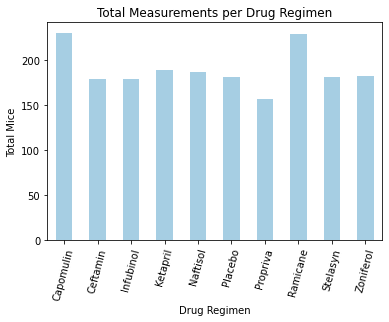

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_ct = drug_groups["Mouse ID"].count()
drug_pdplot = drug_regimen_ct.plot.bar( rot = 75, title = "Total Measurements per Drug Regimen", fontsize =10, colormap = "Paired")
drug_pdplot.set_xlabel("Drug Regimen")
drug_pdplot.set_ylabel("Total Mice")
drug_pdplot

In [19]:
drug_regimen_ct.head()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Name: Mouse ID, dtype: int64

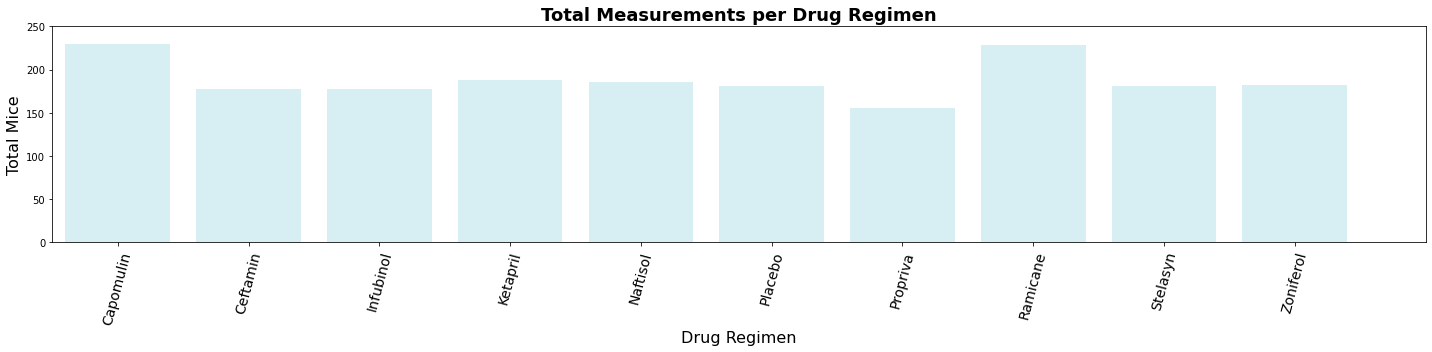

In [35]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot
# Set x axis and tick locations
x_axis = np.arange(len(drug_regimen_ct))
y_axis = drug_regimen_ct

#Make ticks 
tx = list(drug_regimen_ct.index.values)
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,5))
plt.bar(x_axis, y_axis, color ='powderblue', alpha=0.5, align="center")
plt.xticks(tick_locations, tx, rotation="75", fontsize = 14)

# Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, 250)

# Set a Title and labels
plt.title("Total Measurements per Drug Regimen",fontsize=18, fontweight='bold')
plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("Total Mice",fontsize=16)
#plt.autoscale(enable=True, axis='x', tight=True)
#plt.tight_layout()


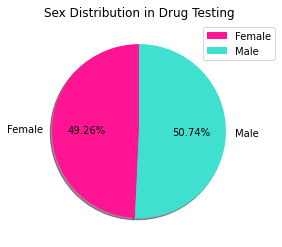

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Separate female and male mice 
mouse_sex = clean_mouse_study.groupby(["Sex"]).count()


# Create a pie chart based upon the trip duration of that single bike
mice_piepd = mouse_sex.plot(kind="pie", y='Mouse ID', title=("Sex Distribution in Drug Testing"),
                            colors = ["deeppink","turquoise"],autopct = "%.2f%%", shadow = True,startangle=90)

#Put y label empty so it doesn't crach with Female
mice_piepd.set_ylabel("")

#Put label and adjust it with bbox_to_anchor so it is not on top of your graph
mice_piepd.legend(loc='upper right', frameon=True, bbox_to_anchor=(1.15, 1))


Male      958
Female    930
Name: Sex, dtype: int64

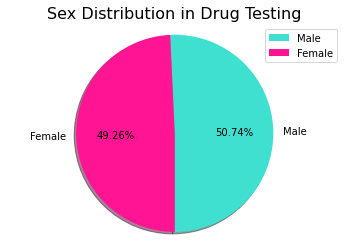

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = clean_mouse_study["Sex"].value_counts()
#Create variables to use in pie chart 

explode = (0,0)
colors =["turquoise", "deeppink"]
labels = list(mice_sex.index)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(mice_sex, explode=explode, labels=labels, colors = colors,
        autopct="%1.2f%%", shadow=True, startangle=270) 
 #Create axes which are equal so we have a perfect circle
plt.title("Sex Distribution in Drug Testing",fontsize=16)
plt.legend(labels, loc='upper right', frameon=True, bbox_to_anchor=(1, 1))
plt.axis("equal")
mice_sex

# Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint=clean_mouse_study.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint 

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [24]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tx_df = pd.merge(max_timepoint , clean_mouse_study, on=(["Mouse ID","Timepoint"]))
tx_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [53]:
# Put treatments into a list for loop (and later for plot labels)
#Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes for treatment in treatments: 
for treatment in treatments:
    tx_regimen = tx_df.loc[tx_df["Drug Regimen"] == treatment]
    tumor_vol= tx_regimen['Tumor Volume (mm3)']
    
#append tumor data to new list 
    tumor_vol_data.append(tumor_vol)

    


In [76]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3
    
#Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

#Print values 
print(f"For {treatments[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")
print(f"For {treatments[1]} values below {lower_bound1} and above {upper_bound1} could be outliers")
print(f"For {treatments[2]} values below {lower_bound2} and above {upper_bound2} could be outliers")
print(f"For {treatments[3]} values below {lower_bound3} and above {upper_bound3} could be outliers")

For Capomulin values below 20.70456164999999 and above 51.83201549 could be outliers
For Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers
For Infubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers


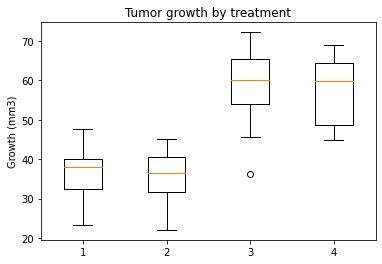

In [78]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor growth by treatment')
ax1.set_ylabel('Growth (mm3)')
ax1.boxplot(tumor_vol_data)
plt.show()

# Line and Scatter Plots

In [83]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Find the mouse treated with Capomulin 
# list of mice treated with Capomulin 
cap_mice = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin"]
cap_mice.value_counts("Mouse ID")


Mouse ID
y793    10
x401    10
b742    10
g288    10
g316    10
i557    10
i738    10
j119    10
l509    10
l897    10
m601    10
m957    10
r554    10
r944    10
s185    10
s710    10
t565    10
u364    10
v923    10
w914    10
b128    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

In [84]:
#Chose mice l509 
Mouse_l509 = clean_mouse_study.loc[clean_mouse_study["Mouse ID"] == "l509"]
Mouse_l509


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


# Correlation and Regression

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight